In [1]:
import numpy as np
import numdifftools as nd
import matplotlib.pyplot as plt
from scipy import optimize, stats

https://stackoverflow.com/questions/78284568/how-do-i-find-the-standard-deviation-of-the-original-data-with-my-optimal-curve

In [2]:
def model(x, a, b):
    return a * x + b

In [3]:
np.random.seed(12345)
x = np.linspace(-1, 1, 30)
p = (2., 3.)
y = model(x, *p)
s = 0.25 * np.ones_like(y)
n = s * np.random.normal(size=y.size)
yn = y + n

In [4]:
popt, pcov = optimize.curve_fit(model, x, yn, sigma=s, absolute_sigma=True)
popt, pcov

(array([2.00095541, 3.08452241]),
 array([[5.84677424e-03, 1.04805847e-11],
        [1.04805847e-11, 2.08333335e-03]]))

In [5]:
yhat = model(x, *popt)

In [15]:
def error(x, p, Cp):
    
    def proxy(r):
        return model(x, *r)
    
    gradient = nd.Gradient(proxy)
    
    def propagation(J):
        return J @ Cp @ J.T
    
    Cy = np.apply_along_axis(propagation, 1, gradient(p))
    sy = np.sqrt(Cy)
    
    return sy

In [6]:
def proxy(x):
    def wrapped(p):
        return model(x, *p)
    return wrapped

In [7]:
grad = nd.Gradient(proxy(x))

In [8]:
def error(J, C=pcov):
    return J @ C @ J.T

In [9]:
Cy = np.apply_along_axis(error, 1, grad(popt))

In [10]:
sy = np.sqrt(Cy)

In [22]:
sy = error(x, popt, pcov)
sy

array([0.08905115, 0.08456633, 0.08017755, 0.07590145, 0.0717582 ,
       0.06777217, 0.06397273, 0.06039513, 0.05708108, 0.05407907,
       0.05144375, 0.04923403, 0.04750934, 0.04632389, 0.04571964,
       0.04571964, 0.04632389, 0.04750934, 0.04923403, 0.05144375,
       0.05407907, 0.05708108, 0.06039513, 0.06397273, 0.06777217,
       0.0717582 , 0.07590145, 0.08017755, 0.08456633, 0.08905115])

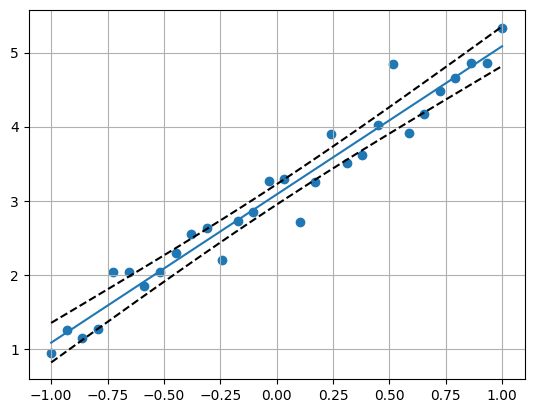

In [21]:
fig, axe = plt.subplots()
axe.scatter(x, yn)
axe.plot(x, yhat)
axe.plot(x, yhat + 3 * sy, "--", color="k")
axe.plot(x, yhat - 3 * sy, "--", color="k")
axe.grid()